In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import sys
sys.path.append('../')
from package_global_functions import *
from subprocess import call

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

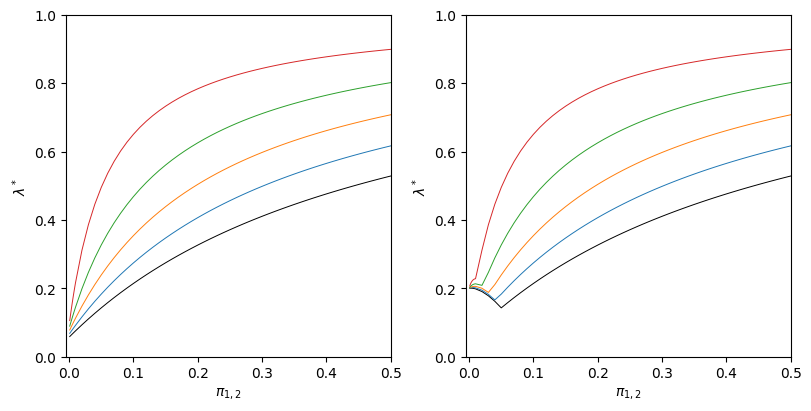

In [8]:
fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
ax[0].set(xlabel=r'$\pi_{1,2}$', ylabel=r'$\lambda^*$', xlim=(-0.005,0.5), ylim=(0,1)) 
ax[1].set(xlabel=r'$\pi_{1,2}$', ylabel=r'$\lambda^*$', xlim=(-0.005,0.5), ylim=(0,1)) 

x = 2
q1, q2 = 7.0, 10.0

# mu 0
tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
ax[0].plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.7)
tline = pd.read_csv(f'{path}/Tline_Qmod2_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
ax[1].plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.7)

# mu neq 0
mus = [0.2, 0.4, 0.6, 0.8]
for mu in mus:
    tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_mu_{mu}_f2_{int(x)}f1.csv')
    ax[0].plot(tline['pi'], tline['lambda'], lw=0.7)
    tline = pd.read_csv(f'{path}/Tline_Qmod2_sym_pis_q1_{float(q1)}_q2_{float(q2)}_mu_{mu}_f2_{int(x)}f1.csv')
    ax[1].plot(tline['pi'], tline['lambda'], lw=0.7)



[Text(0.5, 0, '$\\pi_{2}/\\pi_{1}$'),
 Text(0, 0.5, '$\\lambda^*$'),
 (0.0, 1.7289),
 (0.0, 1.0)]

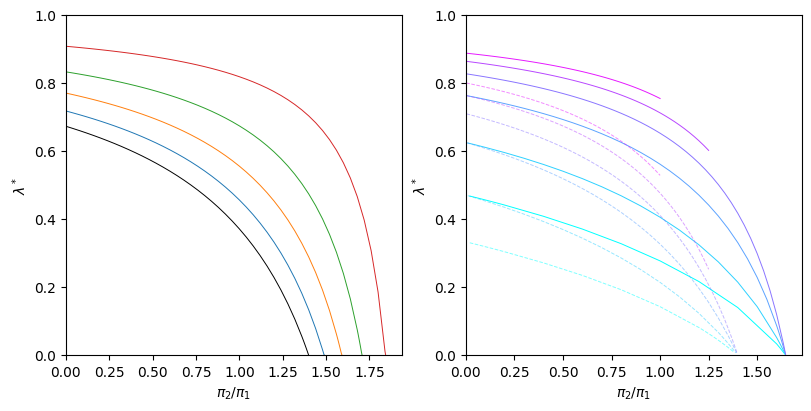

In [12]:
fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)



x = 2
q1, q2 = 7.0, 10.0
pi1 = 0.25

# mu 0
tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
tline = tline.rename(columns={'lambda':'l'})
i_last_pi2 = tline.query('l != l').iloc[0].name
tline.at[i_last_pi2, 'l'] = 0.0
ax[0].plot(tline['pi2']/pi1, tline['l'], color='xkcd:black', lw=0.7)

# mu neq 0
mus = [0.2, 0.4, 0.6, 0.8]
for mu in mus:
    tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_mu_{mu}_f2_{int(x)}f1.csv')
    tline = tline.rename(columns={'lambda':'l'})
    i_last_pi2 = tline.query('l != l').iloc[0].name
    tline.at[i_last_pi2, 'l'] = 0.0
    ax[0].plot(tline['pi2']/pi1, tline['l'], lw=0.7)

mu = 0.5
pi1s = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
colors = plt.cm.cool(np.linspace(0,0.9,len(pi1s)))
for pi1,c in zip(pi1s,colors):
    tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    tline = tline.rename(columns={'lambda':'l'})
    # i_last_pi2 = tline.query('l != l').iloc[0].name
    # tline.at[i_last_pi2, 'l'] = 0.0
    ax[1].plot(tline['pi2']/pi1, tline['l'], color=c, lw=0.7, alpha=0.5, ls='--')
    tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_mu_{mu}_f2_{int(x)}f1.csv')
    ax[1].plot(tline['pi2']/pi1, tline['lambda'], color=c, lw=0.7)

ax[0].set(xlabel=r'$\pi_{2}/\pi_{1}$', ylabel=r'$\lambda^*$', xlim=(0,None), ylim=(0,1)) 
ax[1].set(xlabel=r'$\pi_{2}/\pi_{1}$', ylabel=r'$\lambda^*$', xlim=(0,None), ylim=(0,1)) 

# Figure for the paper:

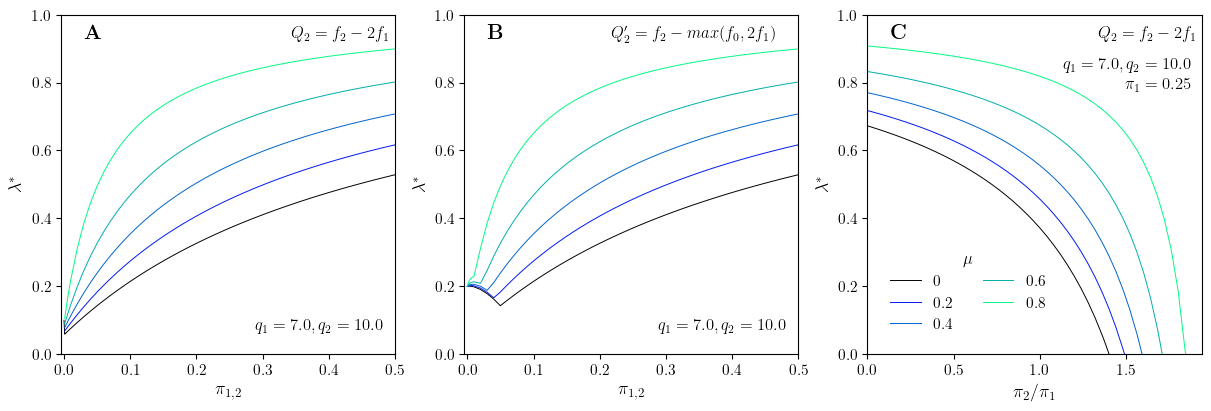

In [2]:
latexFont(size=12, titlesize=11, ticklabelssize=11, labelsize=13)

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
# ax[0].set(xlabel=r'$\pi_{1,2}$', ylabel=r'$\lambda^*$', xlim=(-0.005,0.5), ylim=(0,1)) 
ax[0].set(xlabel=r'$\pi_{1,2}$', ylabel=r'$\lambda^*$', xlim=(-0.005,0.5), ylim=(0,1)) 
ax[1].set(xlabel=r'$\pi_{1,2}$', ylabel=r'$\lambda^*$', xlim=(-0.005,0.5), ylim=(0,1)) 

x = 2
q1, q2 = 7.0, 10.0

# mu 0
tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
tline.loc[-1] = [0.0, 0.1]
tline.index = tline.index + 1
tline = tline.sort_index()
ax[0].plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.7)
tline = pd.read_csv(f'{path}/Tline_Qmod2_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
tline.loc[-1] = [0.0, 0.2]
tline.index = tline.index + 1
tline = tline.sort_index()
ax[1].plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.7)

# mu neq 0
mus = [0.2, 0.4, 0.6, 0.8]
mu_colors = plt.cm.winter(np.linspace(0.1,0.98,len(mus)))
for mu,muc in zip(mus,mu_colors):
    tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_mu_{mu}_f2_{int(x)}f1.csv')
    ax[0].plot(tline['pi'], tline['lambda'], lw=0.7, color=muc)
    tline.loc[-1] = [0.0, 0.1]
    tline.index = tline.index + 1
    tline = tline.sort_index()
    tline = pd.read_csv(f'{path}/Tline_Qmod2_sym_pis_q1_{float(q1)}_q2_{float(q2)}_mu_{mu}_f2_{int(x)}f1.csv')
    tline.loc[-1] = [0.0, 0.2]
    tline.index = tline.index + 1
    tline = tline.sort_index()
    ax[1].plot(tline['pi'], tline['lambda'], lw=0.7, color=muc)
    

# ASYMMETRIC DISCOVERY
x = 2
q1, q2 = 7.0, 10.0
pi1 = 0.25

# mu 0
tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
tline = tline.rename(columns={'lambda':'l'})
i_last_pi2 = tline.query('l != l').iloc[0].name
tline.at[i_last_pi2, 'l'] = 0.0
ax[2].plot(tline['pi2']/pi1, tline['l'], color='xkcd:black', lw=0.7, label=0)

# mu neq 0
# mus = [0.2, 0.4, 0.6, 0.8]
for mu,muc in zip(mus,mu_colors):
    tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_mu_{mu}_f2_{int(x)}f1.csv')
    tline = tline.rename(columns={'lambda':'l'})
    i_last_pi2 = tline.query('l != l').iloc[0].name
    tline.at[i_last_pi2, 'l'] = 0.0
    ax[2].plot(tline['pi2']/pi1, tline['l'], lw=0.7, color=muc, label=mu)

ax[2].legend(loc=(0.05,0.05), title=r'$\mu$', fontsize=11, title_fontsize=12, frameon=False, ncol=2)
ax[2].set(xlabel=r'$\pi_{2}/\pi_{1}$', ylabel=r'$\lambda^*$', xlim=(0,None), ylim=(0,1)) 

ax[0].text(0.07,0.93, r'$\textbf{A}$', transform=ax[0].transAxes, fontsize=15)
ax[1].text(0.07,0.93, r'$\textbf{B}$', transform=ax[1].transAxes, fontsize=15)
ax[2].text(0.07,0.93, r'$\textbf{C}$', transform=ax[2].transAxes, fontsize=15)

ax[0].text(0.69, 0.93, r'$Q_2 = f_2 - 2 f_1$', transform=ax[0].transAxes)
ax[1].text(0.44, 0.93, r"$Q_2' = f_2 - max(f_0, 2 f_1)$", transform=ax[1].transAxes)
ax[2].text(0.69, 0.93, r'$Q_2 = f_2 - 2 f_1$', transform=ax[2].transAxes)

ax[0].text(0.58, 0.07, rf'$q_1 = {q1}, q_2 = {q2}$', transform=ax[0].transAxes)
ax[1].text(0.58, 0.07, rf'$q_1 = {q1}, q_2 = {q2}$', transform=ax[1].transAxes)
ax[2].text(0.585, 0.84, rf'$q_1 = {q1}, q_2 = {q2}$', transform=ax[2].transAxes)
ax[2].text(0.77, 0.78, rf'$\pi_1 = {pi1}$', transform=ax[2].transAxes)

fig.savefig(f'Qlines_var_mu_sym_asym_q1_{q1}_q2_{q2}_pi1_{pi1}.pdf')